In [1]:
import sys
sys.path.append('../')
import numpy as np
from matplotlib import pyplot as plt
from RNN_class import *
from helper import *
%load_ext autoreload
%autoreload 2

In [23]:
N = 20
T = 10
hidden_N = 20
bptt_depth = 10
epochs = 20000
lr = 0.05
learning_alg = 'predrec'

inputs = create_inputs(N, T+1, T, sigma=1)
y_mini = np.zeros((N, bptt_depth))
y_mini[:,:bptt_depth] = inputs[:,:bptt_depth]
print_freq = 1000

h0 = np.zeros((hidden_N))


In [24]:
def train_partial(Y_mini, h0, n_epochs, lr, learning_alg):
    '''
    Fix the intermediate recording of predloss (10/26/2021 Y.C.)
    Note first time-step info is not used (07/08/2021,Y.C.)
    Add stop criteria (07/11/2021, Y.C.)
        INPUT:
            Y_mini: seqN*featureN
            n_epochs: number of epoches to train
            net: pre-defined network structure
            RecordEp: the recording and printing frequency
        OUTPUT:
            net:
            loss_list:
            y_hat: SeqN*HN
    ''' 

    loss_list = []
    N,T = Y_mini.shape
    hidden_N = h0.shape[0]
    epoch = 0

    hidden_rep = []
    output_rep = []
    dLdW_list = []
    dLdV_list = []
    dLdU_list = []
    dLdb_list = []
    dLdc_list = []

    if (learning_alg == "bptt"):
        net = BPTTRNN(N,hidden_N,T)
    elif (learning_alg == "local"):
        net = LocalRNN(N,hidden_N,T)
    elif (learning_alg == "predrec"):
        net = PredRec(N,hidden_N,T)
    else:
        raise NotImplementedError

    while epoch < n_epochs:
        y = Y_mini
        # not optimized - doing forward prop twice
        h_seq, y_hat, L = net.forward_propagation(y,h0)
        L, dLdV, dLdW, dLdU, dLdb, dLdc = net.gradient(y,h0)
        loss_list.append(L)
        dLdW_list.append(dLdW)
        dLdV_list.append(dLdV)
        dLdU_list.append(dLdU)
        dLdb_list.append(dLdb)
        dLdc_list.append(dLdc)
        net.update_weights(dLdV, dLdW, dLdU, dLdb, dLdc, lr) # Updates the weights accordingly
        epoch += 1
        if epoch%print_freq == 0:
            h_seq, y_hat, L = net.forward_propagation(y,h0)
            hidden_rep.append(h_seq)
            output_rep.append(y_hat)
            print('Epoch: {}/{}.............'.format(epoch,n_epochs), end=' ')
            print("Loss: {:.4f}".format(L))

    return net, loss_list, [dLdW_list, dLdV_list, dLdU_list, dLdb_list, dLdc_list], hidden_rep, output_rep

In [25]:
net, loss_list, grad_list, hidden_rep, output_rep = train_partial(y_mini, h0, epochs, lr, learning_alg)

Epoch: 1000/20000............. Loss: 0.0405
Epoch: 2000/20000............. Loss: 0.0403
Epoch: 3000/20000............. Loss: 0.0399
Epoch: 4000/20000............. Loss: 0.0368
Epoch: 5000/20000............. Loss: 0.0291
Epoch: 6000/20000............. Loss: 0.0198
Epoch: 7000/20000............. Loss: 0.0135
Epoch: 8000/20000............. Loss: 0.0106
Epoch: 9000/20000............. Loss: 0.0095
Epoch: 10000/20000............. Loss: 0.0090
Epoch: 11000/20000............. Loss: 0.0087
Epoch: 12000/20000............. Loss: 0.0083
Epoch: 13000/20000............. Loss: 0.0079
Epoch: 14000/20000............. Loss: 0.0074
Epoch: 15000/20000............. Loss: 0.0067
Epoch: 16000/20000............. Loss: 0.0059
Epoch: 17000/20000............. Loss: 0.0052
Epoch: 18000/20000............. Loss: 0.0045
Epoch: 19000/20000............. Loss: 0.0039
Epoch: 20000/20000............. Loss: 0.0033


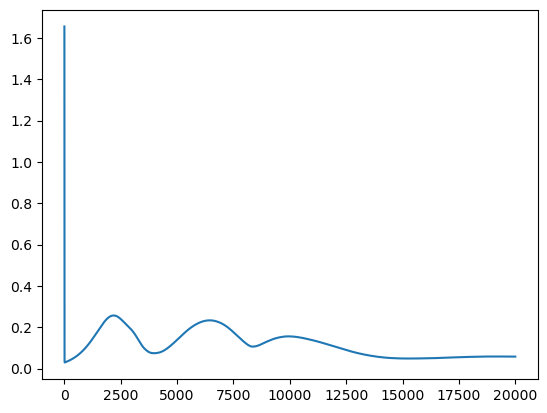

In [26]:
plt.plot([np.sum(np.sum(abs(x))) for x in grad_list[0]])
plt.show()

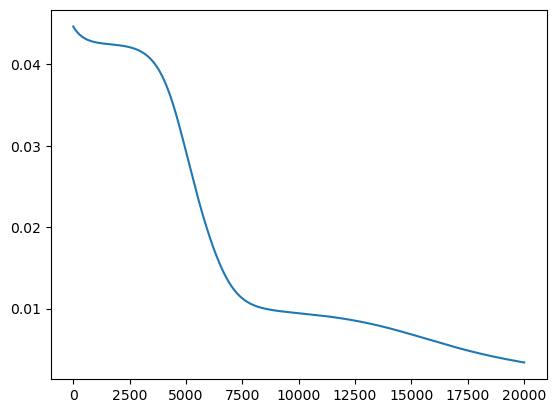

In [27]:
plt.plot(loss_list)
#plt.yscale("log")
plt.show()

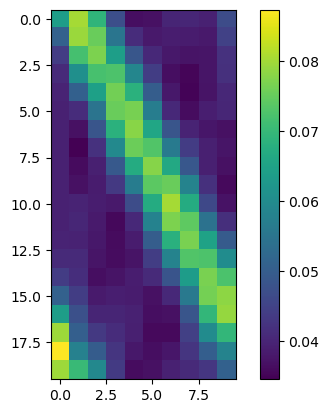

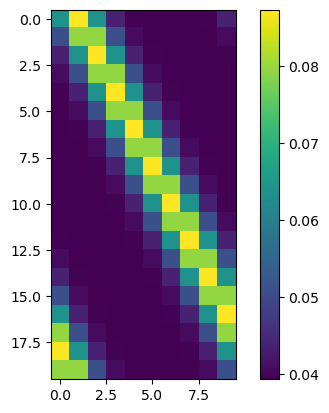

In [28]:
final_rec = output_rep[-1]
plt.imshow(final_rec)
#plt.clim(0,0.1)
plt.colorbar()
plt.show()

plt.imshow(y_mini)
#plt.clim(0,0.1)
plt.colorbar()
plt.show()

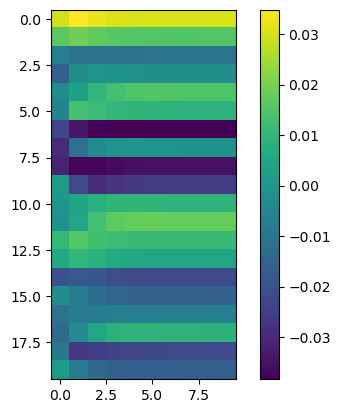

In [21]:
plt.imshow(hidden_rep[-1])
plt.colorbar()
plt.show()

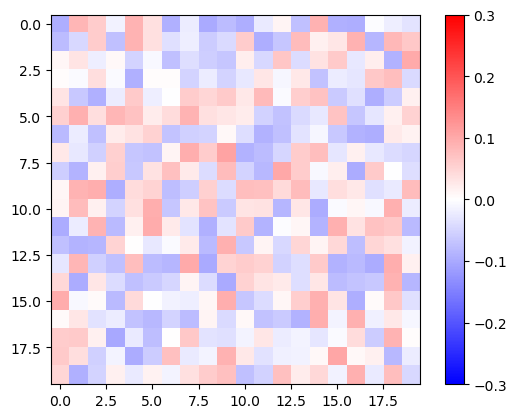

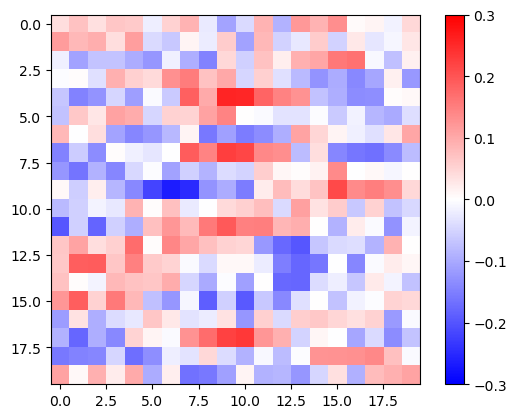

In [22]:
plt.imshow(net.V.T, cmap='bwr')
plt.clim(-0.3,0.3)
plt.colorbar()
plt.show()

plt.imshow(net.U, cmap='bwr')
plt.clim(-0.3,0.3)
plt.colorbar()
plt.show()

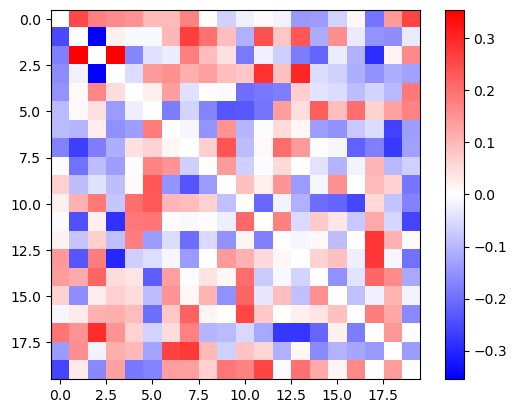

In [34]:
plt.imshow(net.U - net.U.T, cmap='bwr')
plt.colorbar()
plt.show()